In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import scvelo as scv
scv.settings.verbosity = 0
import unitvelo as utv

import warnings
warnings.filterwarnings("ignore")

(Running UniTVelo 0.2.5.2)
2024-06-26 17:41:32


# Mouse_Brain_10X

In [2]:
save_dir = "0625_201315"

path_result = "/data/nelkazwi/RNA_velo/Unitvelo_atac/E18_mouse_brain_10X/Mode_2/checkpoints/VelocityDemo/"
adata = sc.read(path_result+str(save_dir)+"/model_last.h5ad")
adata_atac = sc.read(path_result+str(save_dir)+"/model_last_atac.h5ad")

In [13]:
path = "/data/nelkazwi/RNA_velo/Multivelo_data/pp_2/"
adata_unv = sc.read_h5ad(path+"unitvelo_fit_data.h5ad")

In [ ]:
adata.obsm['X_umap'] = adata_unv.obsm['X_umap']

  0%|          | 0/3433 [00:00<?, ?cells/s]

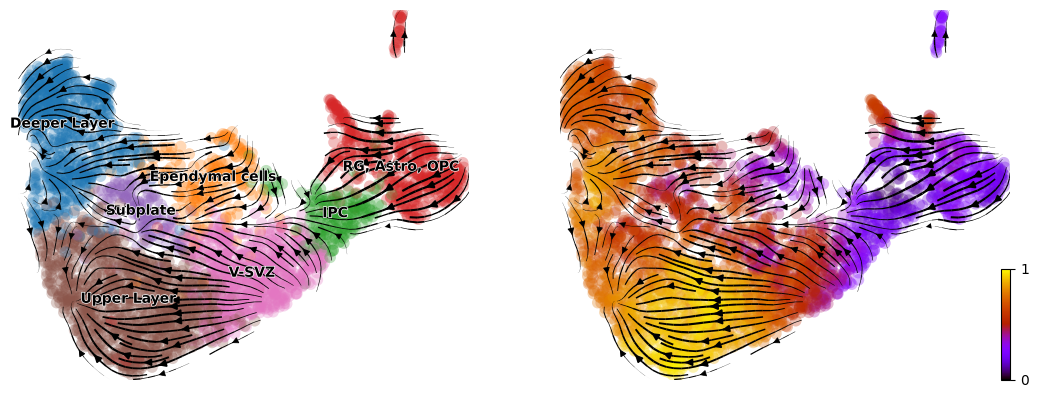

In [16]:
sc.pp.neighbors(adata)
sc.tl.umap(adata, n_components=2)
#sc.pl.umap(adata,color=["celltype","latent_time"],legend_loc = 'on data',color_map='gnuplot')
scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata, color=['celltype','latent_time'], dpi=100, title='',color_map='gnuplot')

  0%|          | 0/3433 [00:00<?, ?cells/s]

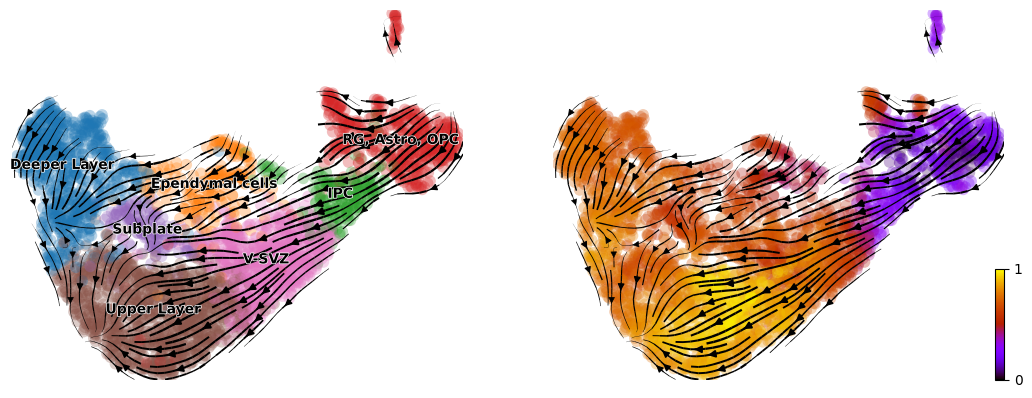

In [18]:
sc.pp.neighbors(adata)
sc.tl.umap(adata, n_components=2)
#sc.pl.umap(adata,color=["celltype","latent_time"],legend_loc = 'on data',color_map='gnuplot')
scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata, color=['celltype','latent_time'], dpi=100, title='',color_map='gnuplot')

'RG, Astro, OPC',
'IPC',
'V-SVZ',
'Upper Layer',
'Deeper Layer',
'Ependymal cells',
'Subplate'

In [5]:
cluster_edges = [
    ('Ependymal cells', 'Subplate'), 
    ('Deeper Layer', 'Upper Layer'), 
    ]

In [8]:
scv.pp.neighbors(adata)
adata_velo = adata[:, adata.var.loc[adata.var['velocity_genes'] == True].index]
utv.evaluate(adata_velo, cluster_edges, "celltype", 'velocity', 'X_umap')

# Cross-Boundary Direction Correctness (A->B)
{('Ependymal cells', 'Subplate'): 0.505068517212596, ('Deeper Layer', 'Upper Layer'): -0.0422086060646405}
Total Mean: 0.23142995557397777
# In-cluster Coherence
{'Deeper Layer': 0.9987641, 'Ependymal cells': 0.9981407, 'IPC': 0.9990367, 'RG, Astro, OPC': 0.99859136, 'Subplate': 0.9984511, 'Upper Layer': 0.9987717, 'V-SVZ': 0.9982439}
Total Mean: 0.9985713958740234


{'Cross-Boundary Direction Correctness (A->B)': {('Ependymal cells',
   'Subplate'): [-0.6043396702722171,
   0.3305836291546762,
   0.6280275648196099,
   -0.5916849432939933,
   0.9174040093467939,
   0.06529135237936748,
   0.7476843761377577,
   0.4261694508150525,
   -0.8130350238710679,
   0.9996598777411194,
   -0.4393013863777226,
   0.3171725833293015,
   0.9763738389126971,
   0.591138779320595,
   0.9576688897035057,
   0.9208961008195888,
   0.6488986841923511,
   0.9256805001340769,
   0.21567439398855204,
   0.6960844426809834,
   0.9091254740130597,
   0.9998284168869879,
   0.09253091916103302,
   0.6722943542060797,
   0.8562188551979018,
   0.5885230974355543,
   0.12218257744713354,
   0.3246957017473646,
   0.2926512669114647,
   0.9873895270786972,
   0.9631712215819062,
   0.7690566399585328,
   -0.17334587168828686,
   0.6648974894714786,
   0.762474969454605,
   0.0073167122609660955,
   0.9048057303577529,
   0.9999840184599234,
   0.5716481402690685,
   -0.100

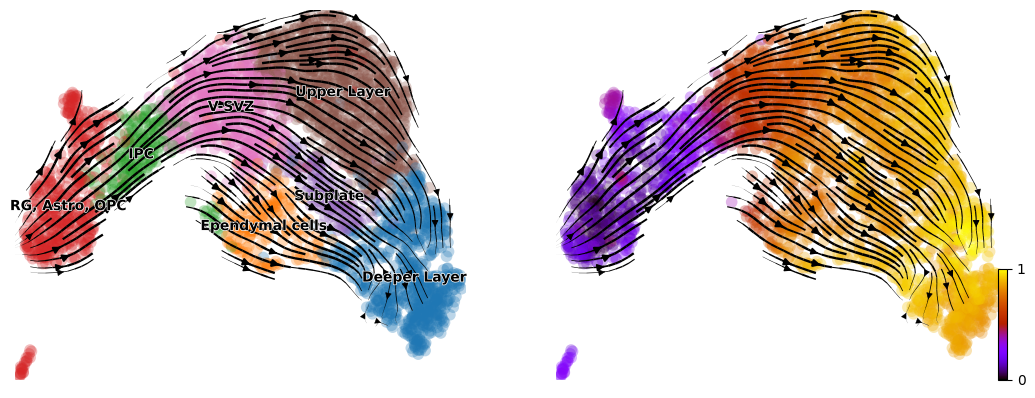

In [9]:
sc.pp.neighbors(adata_unv)
sc.tl.umap(adata_unv, n_components=2)
#sc.pl.umap(adata_unv,color=["celltype","latent_time"],legend_loc = 'on data',color_map='gnuplot')
#scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata_unv, color=['celltype','latent_time'], dpi=100, title='',color_map='gnuplot')

In [3]:
c = np.where(np.log(adata.varm["fit_region_weights"])!=0)[1]
r = np.where(np.log(adata.varm["fit_region_weights"])!=0)[0]

In [15]:
gene_name = "Col4a5"
adata.var[adata.var_names == gene_name]#['velocity_genes']

,Accession,chrom,chromEnd,chromStart,Strand,gene_count_corr,means,dispersions,dispersions_norm,highly_variable,...,fit_gamma,fit_beta,fit_offset,fit_a,fit_t,fit_h,fit_intercept,fit_etta,fit_sr2,fit_ur2
Gene,,,,,,,,,,,,,,,,,,,,,
Col4a5,ENSMUSG00000031274,chrX,141689234,141475385,+,-0.0605,0.020497,0.681073,1.31121,True,...,2.094881,0.392348,-0.315239,0.83431,0.46338,0.307903,0.35649,0.721356,-2.053241,-3.079274


In [16]:
gene_number = np.where(adata.var_names == gene_name)[0][0]
r_g = adata.varm["fit_region_weights"][gene_number,c[r == gene_number]]

In [19]:
adata_atac.var["chromStart"][c[r == gene_number]]

chrX:141473617-141474087    141473617
chrX:141475100-141475989    141475100
chrX:141590404-141590418    141590404
chrX:141640797-141641326    141640797
Name: chromStart, dtype: int64

In [20]:
distance_regions = adata_atac.var["chromStart"][c[r == gene_number]].values
gene_end = adata.var[adata.var_names == gene_name]["chromEnd"].values[0]
gene_start = adata.var[adata.var_names == gene_name]["chromStart"].values[0]

<AxesSubplot:>

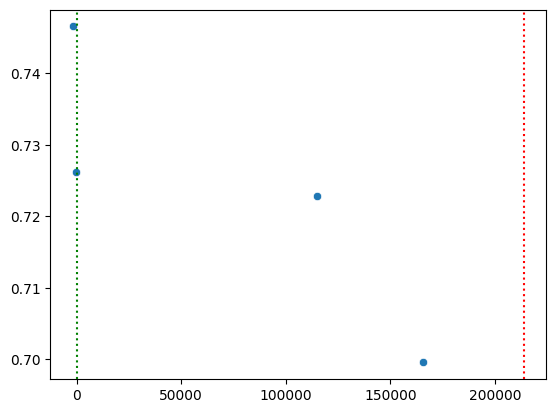

In [23]:

plt.axvline(x=0, ymin=0, ymax=10,color='green', linestyle='dotted')
plt.axvline(x=gene_end - gene_start, ymin=0, ymax=10,color='red', linestyle='dotted')
sns.scatterplot(x= distance_regions - gene_start, y=r_g )

In [32]:
adata.varm["fit_region_weights"].shape

(2000, 42535)

In [4]:
adata.var['fit_etta'][np.unique(r)]

Gene
Mybl1      0.706395
Gm28756    1.778165
Tram2      0.980459
Ogfrl1     2.393244
Fam135a    2.241531
             ...   
Col4a5     0.721356
Htr2c      1.111369
Ap1s2      2.149237
Fancb      2.345985
Gm47283    2.322174
Name: fit_etta, Length: 1559, dtype: float32

# Human_Cerebral_Cortex


In [32]:
save_dir = '0626_101517'
path_result = '/data/nelkazwi/RNA_velo/Unitvelo_atac/Human_Cerebral_Cortex/Mode_2/checkpoints/VelocityDemo/'
adata = sc.read(path_result+str(save_dir)+"/model_last.h5ad")
adata_atac = sc.read(path_result+str(save_dir)+"/model_last_atac.h5ad")

In [28]:
adata_atac

AnnData object with n_obs × n_vars = 4667 × 67368
    obs: 'index', 'celltype', 'n_counts'
    var: 'chrom', 'chromStart', 'chromEnd', 'n_counts'
    uns: 'celltype_colors', 'neighbors', 'umap'
    obsm: 'X_umap', 'cisTopic'
    obsp: 'connectivities', 'distances'

In [30]:
adata.obsm["X_umap"] = adata_unv.obsm["X_umap"] 

  0%|          | 0/4667 [00:00<?, ?cells/s]

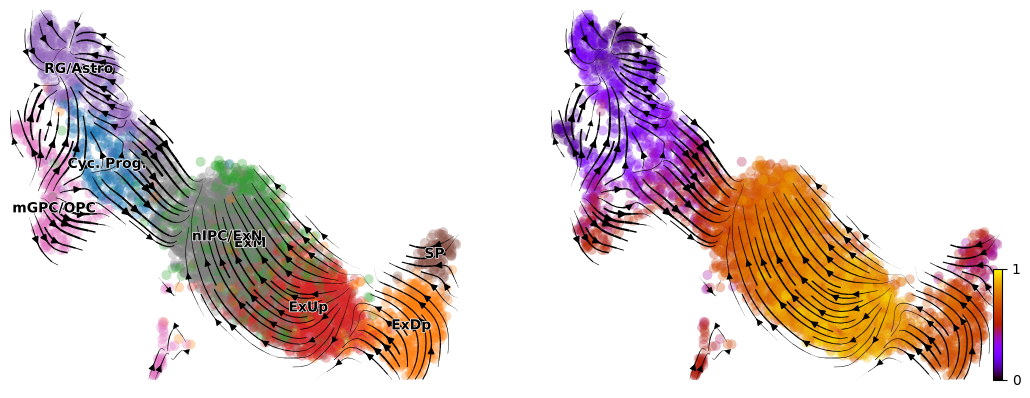

In [33]:
sc.pp.neighbors(adata)
sc.tl.umap(adata, n_components=2)
# sc.pl.umap(adata,color=["celltype","latent_time"],legend_loc = 'on data',color_map='gnuplot')
scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata, color=['celltype','latent_time'], dpi=100, title='',color_map='gnuplot')

In [4]:
# dataset = '/data/nelkazwi/RNA_velo/Unitvelo_atac/Human_Cerebral_Cortex/RNA_data.h5ad'
# label = 'celltype'
# exp_metrics = {}
# velo_config = utv.config.Configuration()
# velo_config.R2_ADJUST = True
# #velo_config.IROOT = 'IPC'
# velo_config.FIT_OPTION = '1'
# velo_config.AGENES_R2 = 1
# velo_config.MAX_ITER = 3000
# adata = utv.run_model(dataset, label, config_file=velo_config)
# path = "/data/nelkazwi/RNA_velo/Unitvelo_atac/unitvelo_alone/Human_Cerebral_Cortex"
# adata.write_h5ad(path+"unitvelo_fit_data.h5ad")

In [23]:
path = "/data/nelkazwi/RNA_velo/Unitvelo_atac/unitvelo_alone/Human_Cerebral_Cortex/"
adata_unv = sc.read(path+'unitvelo_fit_data.h5ad')

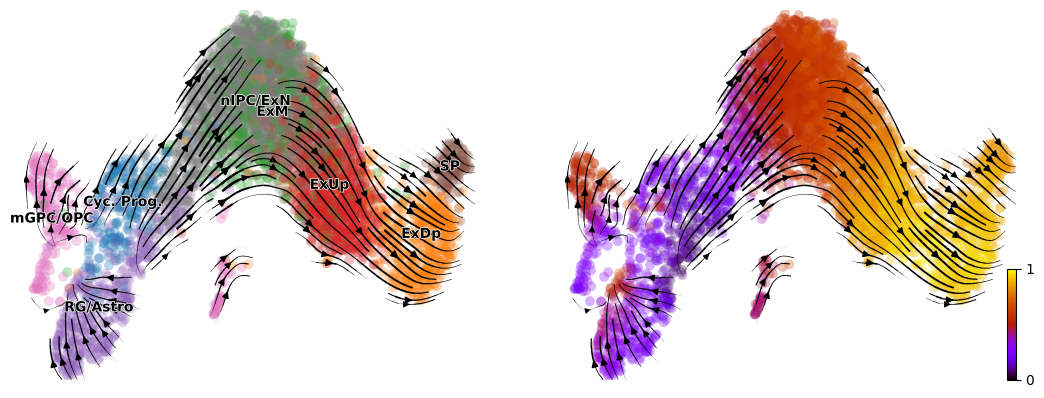

In [24]:
sc.pp.neighbors(adata_unv)
sc.tl.umap(adata_unv, n_components=2)
#sc.pl.umap(adata_unv,color=["celltype","latent_time"],legend_loc = 'on data',color_map='gnuplot')
#scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata_unv, color=['celltype','latent_time'], dpi=100, title='',color_map='gnuplot')

In [39]:
import json
from pathlib import Path
from collections import OrderedDict
fname = Path('/data/nelkazwi/code/UniTVelo-ATAC/unitvelo/config/config_main_10X_mouse_brain.json')
with fname.open('rt') as handle:
        data = json.load(handle, object_hook=OrderedDict)

In [3]:
df = adata_atac.var
df

,chrom,chromStart,chromEnd
chr1:4914588-4914730,chr1,4914588,4914730
chr1:4923057-4923478,chr1,4923057,4923478
chr1:4926231-4926701,chr1,4926231,4926701
chr1:4969719-4971621,chr1,4969719,4971621
chr1:5012780-5013257,chr1,5012780,5013257
...,...,...,...
chrY:90800303-90800705,chrY,90800303,90800705
chrY:90801406-90801781,chrY,90801406,90801781
chrY:90804581-90805542,chrY,90804581,90805542
chrY:90808563-90809244,chrY,90808563,90809244


In [4]:
nregions = adata_atac.X.shape[1]
adata_atac.var['region_number'] = np.arange(0, nregions)
adata_atac.var

,chrom,chromStart,chromEnd,region_number
chr1:4914588-4914730,chr1,4914588,4914730,0
chr1:4923057-4923478,chr1,4923057,4923478,1
chr1:4926231-4926701,chr1,4926231,4926701,2
chr1:4969719-4971621,chr1,4969719,4971621,3
chr1:5012780-5013257,chr1,5012780,5013257,4
...,...,...,...,...
chrY:90800303-90800705,chrY,90800303,90800705,25869
chrY:90801406-90801781,chrY,90801406,90801781,25870
chrY:90804581-90805542,chrY,90804581,90805542,25871
chrY:90808563-90809244,chrY,90808563,90809244,25872
